In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("Classified Data", index_col = 0)

In [18]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


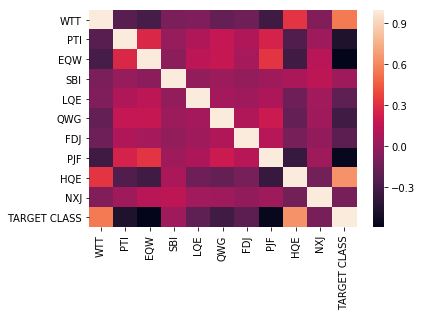

In [24]:
sns.heatmap(df.corr())

In [25]:
df.drop('SBI', axis = 1, inplace=True)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
ss = StandardScaler()

In [28]:
Scaled_arry = ss.fit_transform(df.drop('TARGET CLASS', axis=1))

In [29]:
X = pd.DataFrame(data = Scaled_arry, columns=df.columns[:-1], index = df.index)

In [30]:
Y = df['TARGET CLASS']

In [32]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=1)

In [57]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [58]:
ypred = knn.predict(x_test)

In [59]:
np.mean(ypred == y_test)

0.9266666666666666

In [66]:
error_rate = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred != y_test))

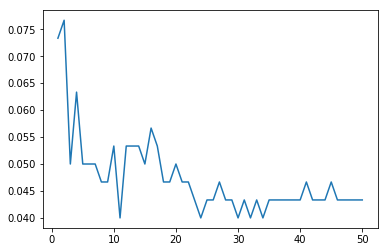

In [68]:
plt.plot(range(1,51),error_rate)

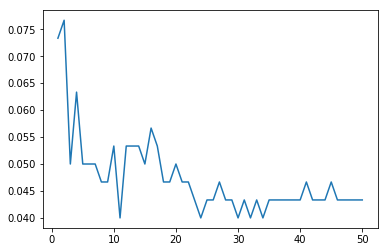

In [69]:
sns.lineplot(x = range(1,51), y = error_rate)

In [71]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
cc= confusion_matrix(y_test,y_pred)

In [74]:
cc

array([[134,   6],
       [  6, 154]], dtype=int64)

In [76]:
acc = (134+154)/(134+154+6+6)
acc

0.96